## Scaling to maximum value - MaxAbsScaling

Maximum absolute scaling scales the data to its maximum value:

X_scaled = X / X.max

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Remove 2 variables:
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [3]:
# let's separate the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

In [4]:
# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# the scaler stores the maximum values of the features as learned from train set
scaler.max_abs_

array([1.50001000e+01, 5.20000000e+01, 1.32533333e+02, 3.40666667e+01,
       3.56820000e+04, 5.99714286e+02])

In [6]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [7]:
# Inspect the original value statistics
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.880013,28.687984,5.442057,1.101109,1426.222061,3.140976
std,1.920007,12.560416,2.862733,0.519956,1091.567168,15.796292
min,0.499900,1.000000,1.465753,0.500000,8.000000,0.692308
25%,2.552150,18.000000,4.414452,1.006494,796.000000,2.436452
50%,3.529600,29.000000,5.227365,1.048741,1169.500000,2.825041
75%,4.768750,37.000000,6.064257,1.098434,1727.250000,3.285501
max,15.000100,52.000000,141.909091,25.636364,16305.000000,1243.333333


In [8]:
# inspect the values after scaling

X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.258666,0.551692,0.041062,0.032322,0.039970,0.005237
std,0.128000,0.241546,0.021600,0.015263,0.030592,0.026340
min,0.033326,0.019231,0.011060,0.014677,0.000224,0.001154
25%,0.170142,0.346154,0.033308,0.029545,0.022308,0.004063
50%,0.235305,0.557692,0.039442,0.030785,0.032776,0.004711
75%,0.317915,0.711538,0.045756,0.032244,0.048407,0.005478
max,1.000000,1.000000,1.070743,0.752535,0.456953,2.073209


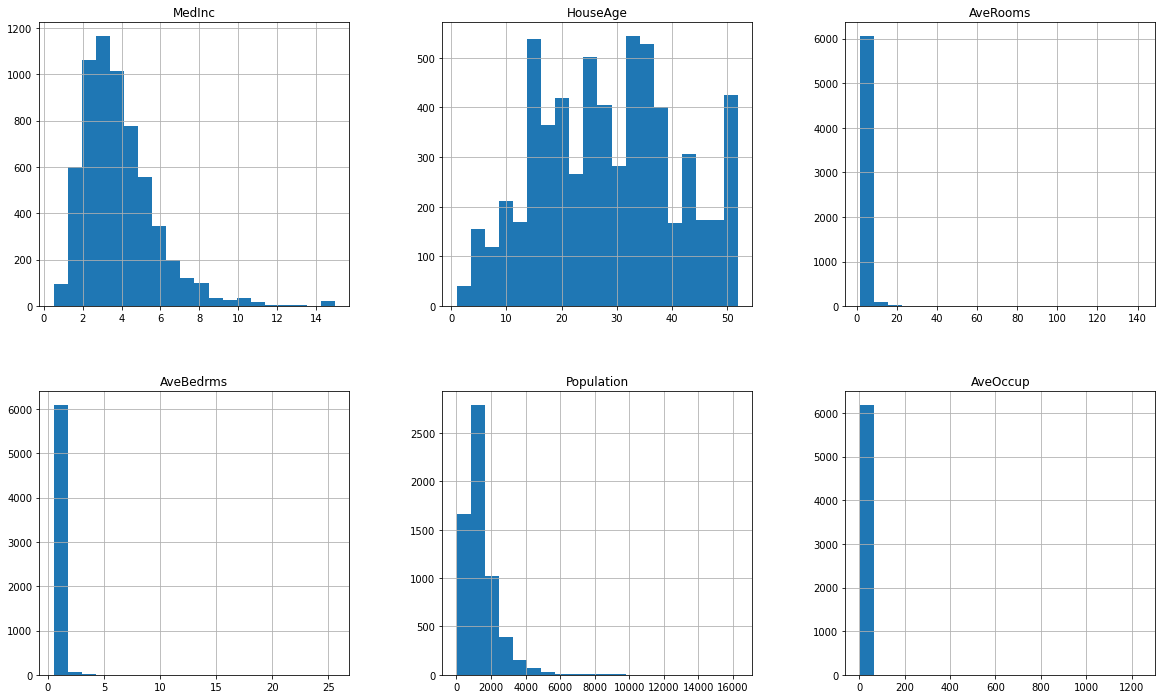

In [9]:
X_test.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

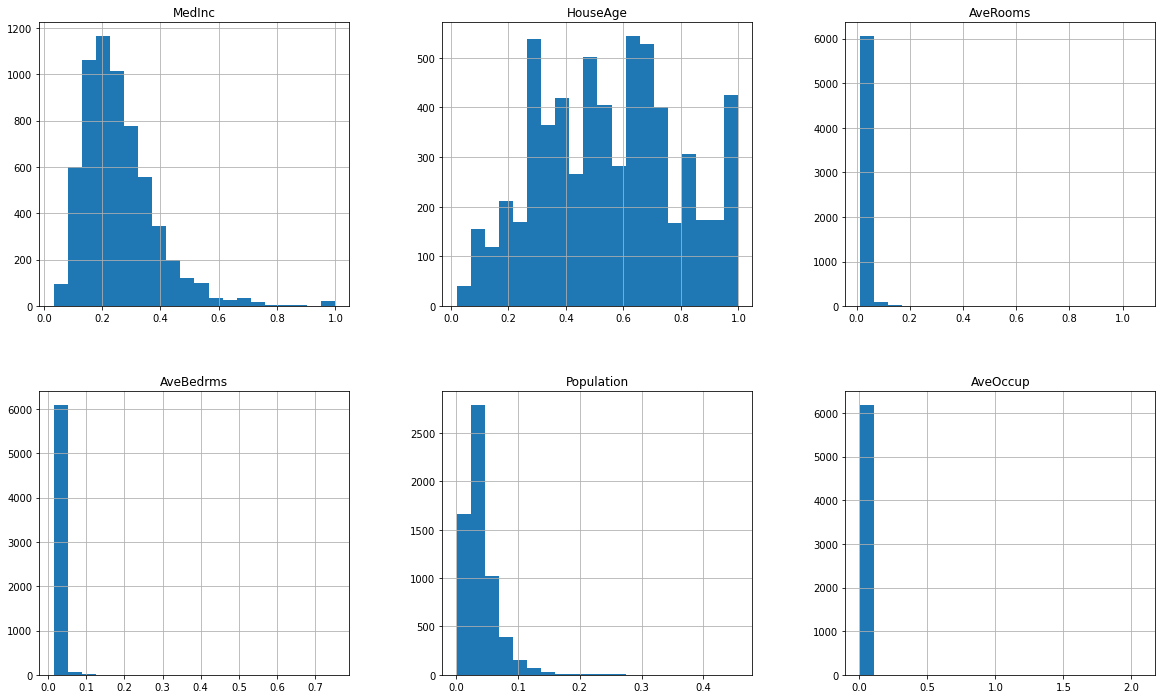

In [10]:
X_test_scaled.hist(bins=20, figsize=(20, 12), layout=(2, 3))
plt.show()

## Centering + MaxAbsScaling

We can center the distributions at zero and then scale to its absolute maximum, as recommended by Scikit-learn by combining the use of 2 transformers.

In [11]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(scaler_mean.transform(X_train))

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [12]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
# Inspect the original value statistics
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,3.880013,28.687984,5.442057,1.101109,1426.222061,3.140976
std,1.920007,12.560416,2.862733,0.519956,1091.567168,15.796292
min,0.499900,1.000000,1.465753,0.500000,8.000000,0.692308
25%,2.552150,18.000000,4.414452,1.006494,796.000000,2.436452
50%,3.529600,29.000000,5.227365,1.048741,1169.500000,2.825041
75%,4.768750,37.000000,6.064257,1.098434,1727.250000,3.285501
max,15.000100,52.000000,141.909091,25.636364,16305.000000,1243.333333


In [14]:
# inspect the values after scaling

X_test_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000,6192.000000
mean,0.001199,0.002509,0.000147,0.000192,0.000031,0.000168
std,0.172454,0.454779,0.022522,0.015770,0.031864,0.026474
min,-0.302402,-1.000000,-0.031136,-0.018039,-0.041369,-0.003936
25%,-0.118069,-0.384475,-0.007938,-0.002677,-0.018366,-0.001012
50%,-0.030275,0.013806,-0.001542,-0.001396,-0.007463,-0.000361
75%,0.081025,0.303465,0.005042,0.000111,0.008818,0.000411
max,1.000000,0.846575,1.073761,0.744318,0.434361,2.078678


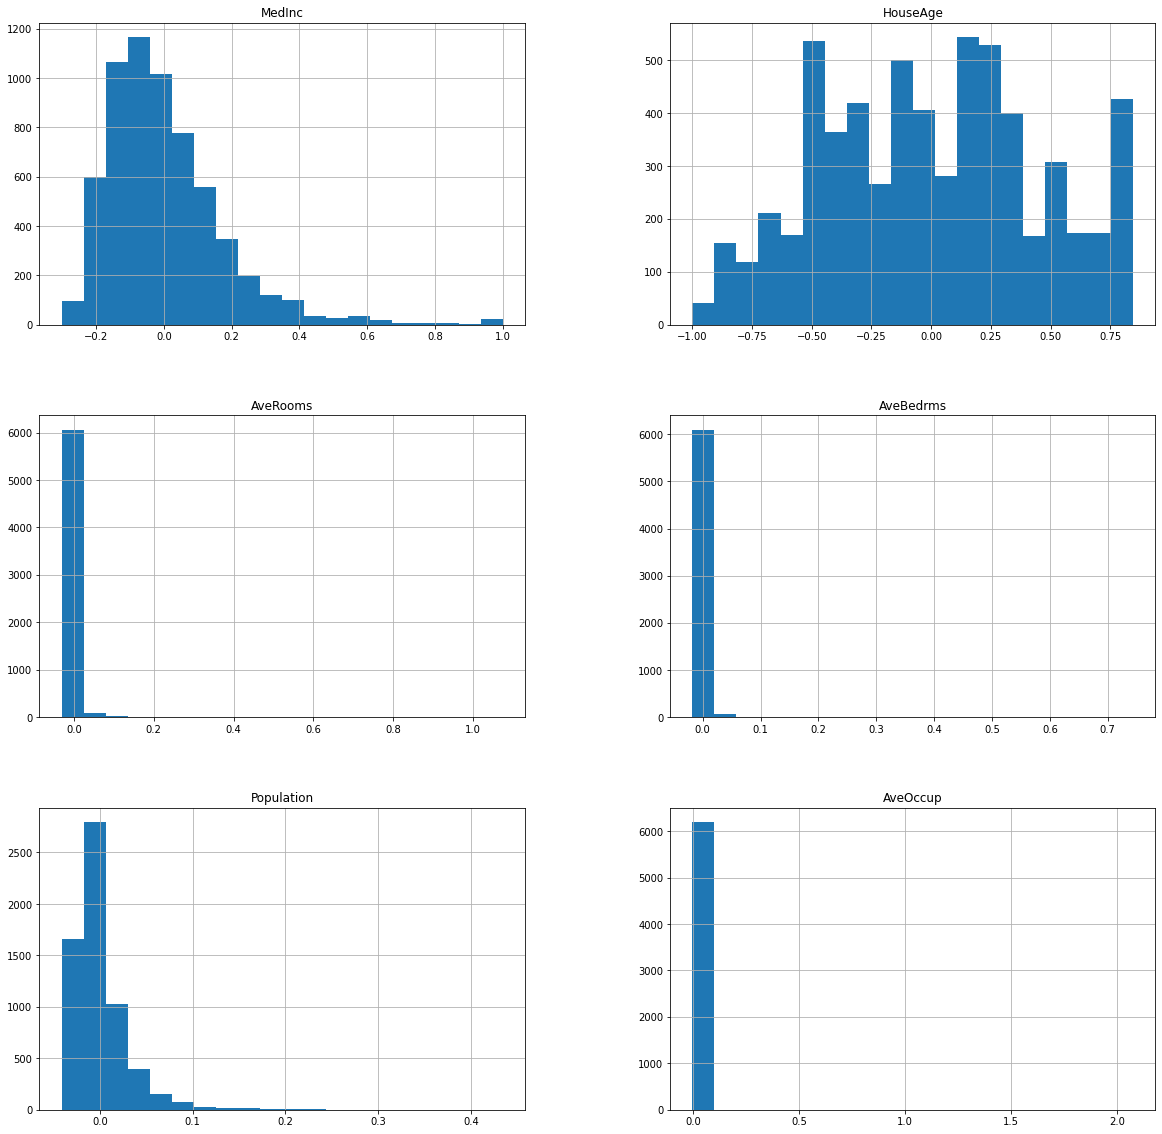

In [15]:
X_test_scaled.hist(bins=20, figsize=(20, 20))
plt.show()